Nepal GIS Assignment

In [1]:
# installing all the required libraries
!pip install -r "requirements.txt"

Load Necessary Libraries

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
import numpy as np
from rasterio.mask import mask
import fiona
import seaborn as sns

In [3]:
import sys
print(sys.executable)

C:\Users\Abin\miniconda3\python.exe


In [4]:
# Shapefile path
path = "data/vector/local_unit.shp"
gdf = gpd.read_file(path)
gdf

,STATE_CODE,DISTRICT,GaPa_NaPa,Type_GN,Province,geometry
0,1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,1,"POLYGON ((87.60985 27.37043, 87.61107 27.36943..."
1,1,TAPLEJUNG,Maiwakhola,Gaunpalika,1,"POLYGON ((87.50402 27.42901, 87.50672 27.42831..."
2,1,TAPLEJUNG,Meringden,Gaunpalika,1,"POLYGON ((87.51272 27.56894, 87.51255 27.56859..."
3,1,TAPLEJUNG,Mikwakhola,Gaunpalika,1,"POLYGON ((87.6885 27.70975, 87.68891 27.70938,..."
4,1,TAPLEJUNG,Phaktanglung,Gaunpalika,1,"POLYGON ((87.83673 27.95137, 87.83735 27.95119..."
...,...,...,...,...,...,...
772,4,NAWALPARASI_E,Chitawan National Park,National Park,Gandaki,"POLYGON ((84.32537 27.68957, 84.32562 27.6894,..."
773,5,RUKUM_E,Bhume,Gaunpalika,5,"POLYGON ((82.65382 28.65759, 82.65428 28.65724..."
774,5,RUKUM_E,Putha Uttarganga,Gaunpalika,5,"POLYGON ((82.76718 28.80407, 82.76748 28.80383..."
775,5,RUKUM_E,Sisne,Gaunpalika,5,"POLYGON ((82.67327 28.85214, 82.67373 28.85205..."


#chaeck crs of shapefile
print("\nCRS:: \n" , gdf.crs)

Pre Processing

In [5]:
# Counting the missing values in each columns
print(gdf.isnull().sum()) 

STATE_CODE    0
DISTRICT      0
GaPa_NaPa     0
Type_GN       0
Province      0
geometry      0
dtype: int64


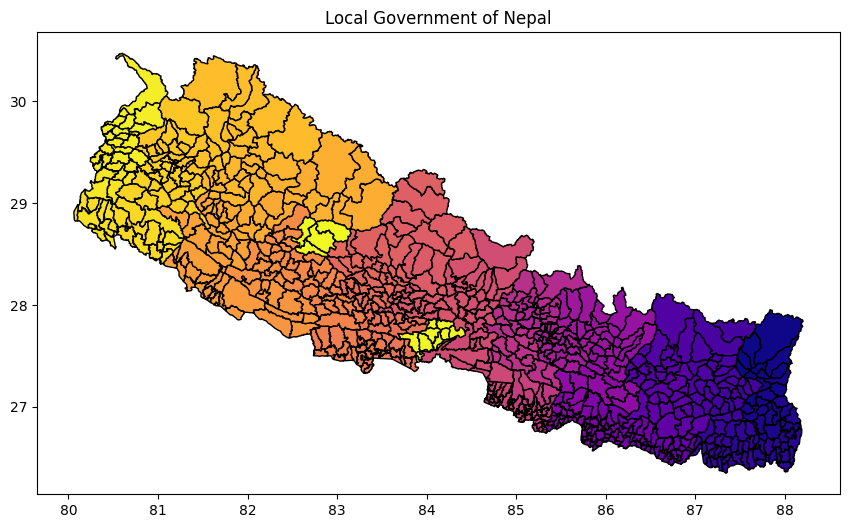

In [6]:
# visualization of shapefile of Nepal
gdf.plot(figsize=(12, 6), cmap="plasma", edgecolor="black")
plt.title("Local Government of Nepal")
plt.show()

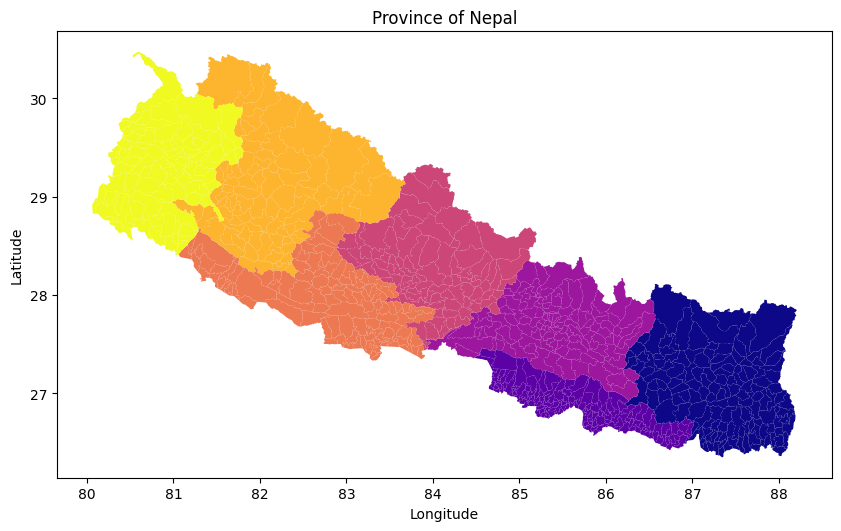

In [7]:
# Province of Nepal Visualization
gdf.plot(column="STATE_CODE", cmap="plasma", legend=False, figsize=(10, 6))
plt.title("Province of Nepal")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [8]:
print(gdf.columns)
print(gdf.dtypes)
print(gdf["DISTRICT"].isnull().sum())  # Check if there are missing values

Index(['STATE_CODE', 'DISTRICT', 'GaPa_NaPa', 'Type_GN', 'Province',
       'geometry'],
      dtype='object')
STATE_CODE       int32
DISTRICT        object
GaPa_NaPa       object
Type_GN         object
Province        object
geometry      geometry
dtype: object
0


Index(['DISTRICT', 'geometry', 'STATE_CODE', 'GaPa_NaPa', 'Type_GN',
       'Province'],
      dtype='object')


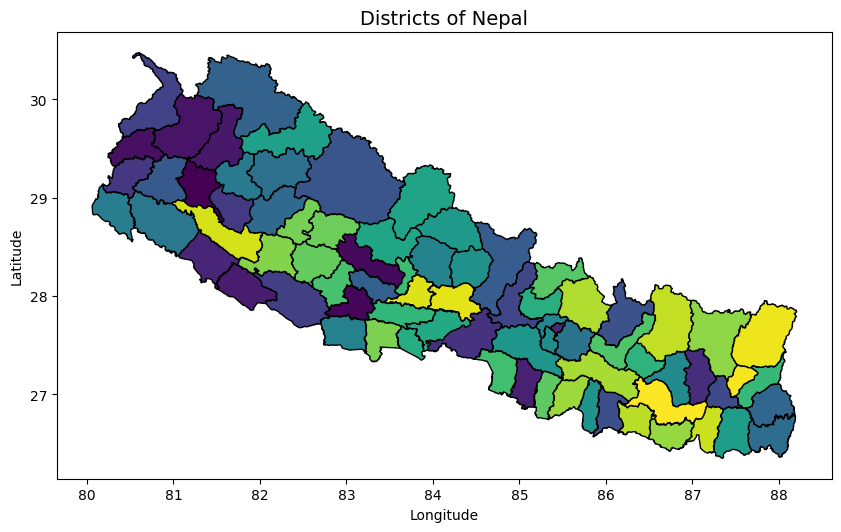

In [9]:
# Dissolve by "DISTRICT" to remove local unit boundaries
districts = gdf.dissolve(by="DISTRICT").reset_index()

# Check the columns to ensure 'DISTRICT' is now a column after dissolving
print(districts.columns)

# Plot only district boundaries
fig, ax = plt.subplots(figsize=(10, 6))
districts.plot(column="DISTRICT", cmap="viridis", edgecolor="black", legend=False, ax=ax)

# Add title and labels
plt.title("Districts of Nepal", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()


In [10]:
# Check the CRS of the GeoDataFrame
print(gdf.crs)

GEOGCS["NepalDD",DATUM["D_Everest_Bangladesh",SPHEROID["Everest 1830 (1937 Adjustment)",6377276.345,300.8017,AUTHORITY["EPSG","7015"]]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


In [11]:
# Check the CRS of the GeoDataFrame
print(districts.crs)

GEOGCS["NepalDD",DATUM["D_Everest_Bangladesh",SPHEROID["Everest 1830 (1937 Adjustment)",6377276.345,300.8017,AUTHORITY["EPSG","7015"]]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


C:\Users\Abin\AppData\Local\Temp\ipykernel_13552\3855406158.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  districts['area'] = districts.geometry.area


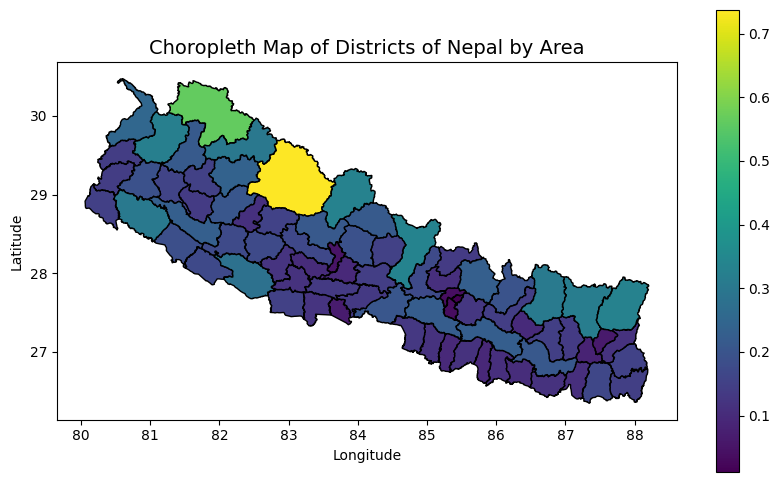

In [12]:
# districts = districts.to_crs(epsg=32644)  # Example: EPSG 32644 corresponds to UTM zone 44N
districts['area'] = districts.geometry.area

# Step 3: Plot the choropleth map using the area as the column
fig, ax = plt.subplots(figsize=(10, 6))
districts.plot(column='area', cmap='viridis', legend=True, ax=ax, edgecolor='black')

# Add title and labels
plt.title("Choropleth Map of Districts of Nepal by Area", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()